In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math

In [34]:
df = pd.read_csv("Weather_data_2016.csv")
df.head(5)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2016-01-01,2016,1,1,NaN,1.4,...,NaN,M,0.0,NaN,9.0,NaN,NaN,NaN,<31,NaN
1,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2016-01-02,2016,1,2,NaN,-2.1,...,NaN,M,0.0,NaN,9.0,NaN,NaN,NaN,<31,NaN
2,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2016-01-03,2016,1,3,NaN,-1.5,...,NaN,M,0.0,NaN,9.0,NaN,NaN,NaN,<31,NaN
3,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2016-01-04,2016,1,4,NaN,-7.3,...,NaN,M,0.0,NaN,9.0,NaN,NaN,NaN,<31,NaN
4,-113.52,53.57,EDMONTON BLATCHFORD,3012209,2016-01-05,2016,1,5,NaN,-7.1,...,NaN,M,0.0,NaN,10.0,NaN,NaN,NaN,<31,NaN


In [74]:
stations = df['Station Name'].value_counts()
print(stations)

EDMONTON BLATCHFORD    366
Name: Station Name, dtype: int64


In [ ]:
df["Date/Time"] = df["Date/Time"].astype('datetime64[ns]')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              366 non-null    float64
 1   Latitude (y)               366 non-null    float64
 2   Station Name               366 non-null    object 
 3   Climate ID                 366 non-null    int64  
 4   Date/Time                  366 non-null    object 
 5   Year                       366 non-null    int64  
 6   Month                      366 non-null    int64  
 7   Day                        366 non-null    int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (°C)              362 non-null    float64
 10  Max Temp Flag              4 non-null      object 
 11  Min Temp (°C)              366 non-null    float64
 12  Min Temp Flag              4 non-null      object 
 13  Mean Temp (°C)             362 non-null    float64

In [71]:
!pip install plotly

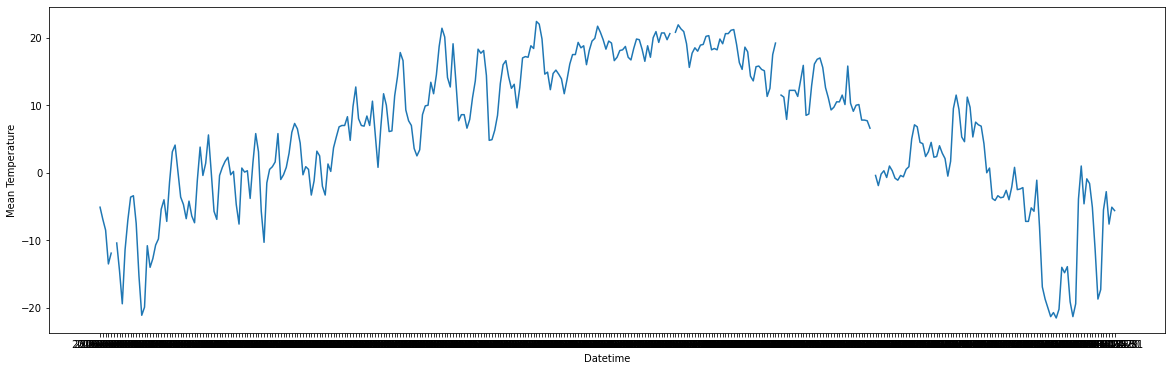

In [70]:
df['datetime'] = pd.to_datetime(df['Date/Time'])
plt.figure(figsize=(20, 6))

# Plot the temperature versus 
# Plot the temperature versus the datetime column
plt.plot(df['Date/Time'], df['Mean Temp (°C)'])

# Label the x and y axes
plt.xlabel('Datetime')
plt.ylabel('Mean Temperature')

# Show the plot
plt.show()

In [73]:
import plotly.express as px
fig = px.line(df, x='Date/Time', y=['Mean Temp (°C)', 'Total Precip (mm)'])
fig.show()

In [76]:
fig = px.line(df, x='Date/Time', y='Total Rain (mm)')
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(df, x='Date/Time', y='Mean Temp (°C)')
fig.show()

In [63]:
max_temp = df.groupby('Month')['Max Temp (°C)'].mean()
max_temp = pd.DataFrame(max_temp)
max_temp = max_temp.reset_index()
max_temp

,Month,Max Temp (°C)
0,1,-3.400000
1,2,3.206897
2,3,6.961290
3,4,15.216667
4,5,19.196774
5,6,23.320000
6,7,24.310000
7,8,23.261290
8,9,17.593103
9,10,5.720000


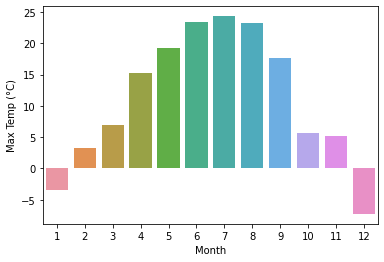

In [65]:
sns.barplot(x='Month', y='Max Temp (°C)', data=max_temp)
plt.show()

In [59]:
grouped = df.groupby('Month')
mean_temp = grouped['Mean Temp (°C)'].mean()
mean_temp = pd.DataFrame(mean_temp)
mean_temp = mean_temp.reset_index()
mean_temp


,Month,Mean Temp (°C)
0,1,-8.543333
1,2,-1.527586
2,3,2.429032
3,4,8.820000
4,5,12.874194
5,6,17.393333
6,7,18.986667
7,8,17.651613
8,9,11.868966
9,10,2.606667


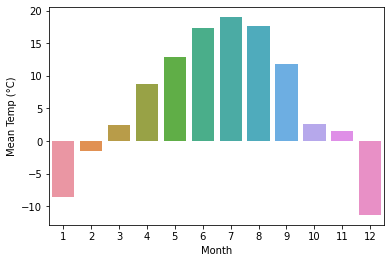

In [60]:
sns.barplot(x='Month', y='Mean Temp (°C)', data=mean_temp)
plt.show()

In [66]:
total_precip = grouped['Total Precip (mm)'].mean()
total_precip = pd.DataFrame(total_precip)
total_precip = total_precip.reset_index()
total_precip

,Month,Total Precip (mm)
0,1,0.290000
1,2,0.282759
2,3,0.461290
3,4,0.330000
4,5,3.416129
5,6,3.016667
6,7,2.943333
7,8,2.367742
8,9,0.634483
9,10,1.520000


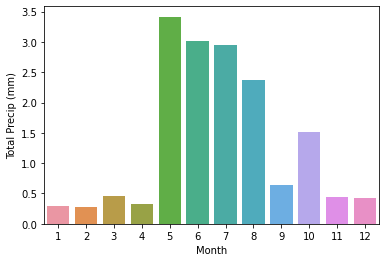

In [68]:
sns.barplot(x='Month', y='Total Precip (mm)', data=total_precip)
plt.show()

In [36]:
def find_categorical_numerical(df):
    categorical = []
    numerical = []
    for col in df.columns:
        if df[col].dtype == 'object':
            categorical.append(col)
        else:
            numerical.append(col)
    return categorical, numerical

In [37]:
categorical, numerical = find_categorical_numerical(df)

In [38]:
# Categorical data is 
print("categorical Data:")
categorical

categorical Data:


['Station Name',
 'Date/Time',
 'Max Temp Flag',
 'Min Temp Flag',
 'Mean Temp Flag',
 'Heat Deg Days Flag',
 'Cool Deg Days Flag',
 'Total Rain Flag',
 'Total Snow Flag',
 'Total Precip Flag',
 'Snow on Grnd Flag',
 'Spd of Max Gust (km/h)']

In [39]:
# Numerical data is :
print("Numerical data:")
numerical

Numerical data:


['Longitude (x)',
 'Latitude (y)',
 'Climate ID',
 'Year',
 'Month',
 'Day',
 'Data Quality',
 'Max Temp (°C)',
 'Min Temp (°C)',
 'Mean Temp (°C)',
 'Heat Deg Days (°C)',
 'Cool Deg Days (°C)',
 'Total Rain (mm)',
 'Total Snow (cm)',
 'Total Precip (mm)',
 'Snow on Grnd (cm)',
 'Dir of Max Gust (10s deg)',
 'Dir of Max Gust Flag',
 'Spd of Max Gust Flag']

In [40]:
df.describe()

,Longitude (x),Latitude (y),Climate ID,Year,Month,Day,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust Flag
count,3.660000e+02,3.660000e+02,366.0,366.0,366.000000,366.000000,0.0,362.000000,366.000000,362.000000,362.000000,362.000000,0.0,0.0,362.000000,136.000000,194.000000,0.0,0.0
mean,-1.135200e+02,5.357000e+01,3012209.0,2016.0,6.513661,15.756831,NaN,11.108011,1.020219,6.062431,12.206077,0.268508,NaN,NaN,1.352210,5.110294,22.561856,NaN,NaN
std,3.699880e-13,2.134546e-13,0.0,0.0,3.455958,8.823592,NaN,11.736416,10.010571,10.685316,10.345077,0.763105,NaN,NaN,4.277968,5.004698,9.760276,NaN,NaN
min,-1.135200e+02,5.357000e+01,3012209.0,2016.0,1.000000,1.000000,NaN,-19.600000,-27.300000,-21.500000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,-1.135200e+02,5.357000e+01,3012209.0,2016.0,4.000000,8.000000,NaN,2.525000,-4.375000,-0.775000,2.400000,0.000000,NaN,NaN,0.000000,0.000000,16.000000,NaN,NaN
50%,-1.135200e+02,5.357000e+01,3012209.0,2016.0,7.000000,16.000000,NaN,12.450000,1.700000,7.000000,11.000000,0.000000,NaN,NaN,0.000000,3.500000,26.500000,NaN,NaN
75%,-1.135200e+02,5.357000e+01,3012209.0,2016.0,9.750000,23.000000,NaN,21.475000,9.300000,15.600000,18.775000,0.000000,NaN,NaN,0.500000,9.000000,31.000000,NaN,NaN
max,-1.135200e+02,5.357000e+01,3012209.0,2016.0,12.000000,31.000000,NaN,30.000000,16.600000,22.400000,39.500000,4.400000,NaN,NaN,41.200000,15.000000,36.000000,NaN,NaN


In [41]:
df.isnull().sum()

Longitude (x)                  0
Latitude (y)                   0
Station Name                   0
Climate ID                     0
Date/Time                      0
Year                           0
Month                          0
Day                            0
Data Quality                 366
Max Temp (°C)                  4
Max Temp Flag                362
Min Temp (°C)                  0
Min Temp Flag                362
Mean Temp (°C)                 4
Mean Temp Flag               362
Heat Deg Days (°C)             4
Heat Deg Days Flag           362
Cool Deg Days (°C)             4
Cool Deg Days Flag           362
Total Rain (mm)              366
Total Rain Flag                0
Total Snow (cm)              366
Total Snow Flag                0
Total Precip (mm)              4
Total Precip Flag            362
Snow on Grnd (cm)            230
Snow on Grnd Flag            321
Dir of Max Gust (10s deg)    172
Dir of Max Gust Flag         366
Spd of Max Gust (km/h)         0
Spd of Max

In [42]:
#df = df.drop(['Data Quality', 'Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag', 'Dir of Max Gust Flag', 'Spd of Max Gust Flag'], axis=1)


In [43]:
df.value_counts()

Series([], dtype: int64)

In [44]:
import seaborn as sns

def plot_count_plots(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(10, 4))
        sns.countplot(x=col, data=df)
        plt.title(f'Count plot for {col}')
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

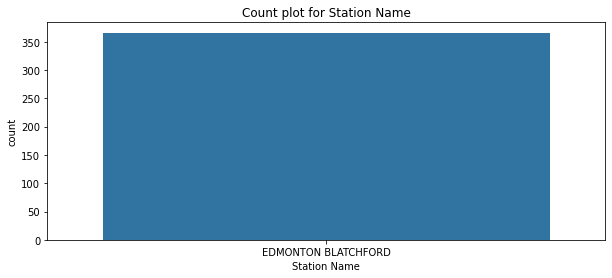

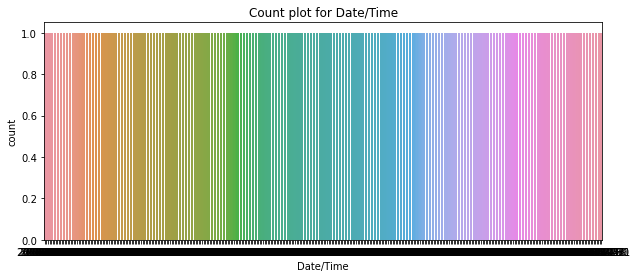

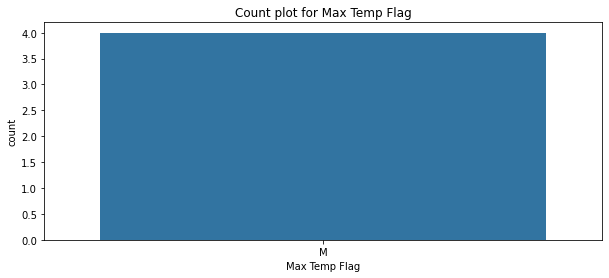

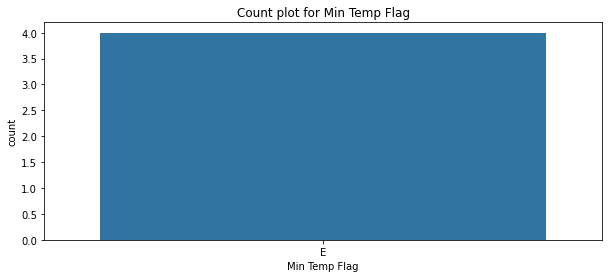

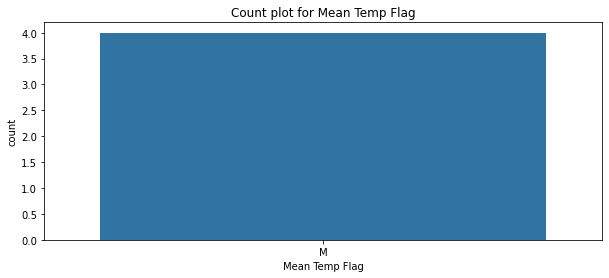

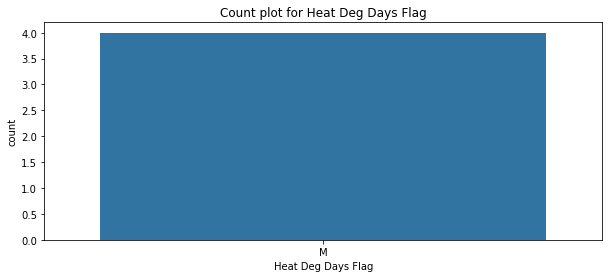

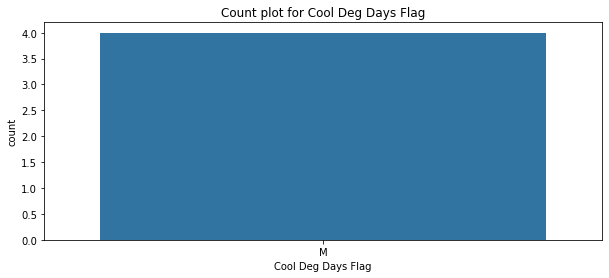

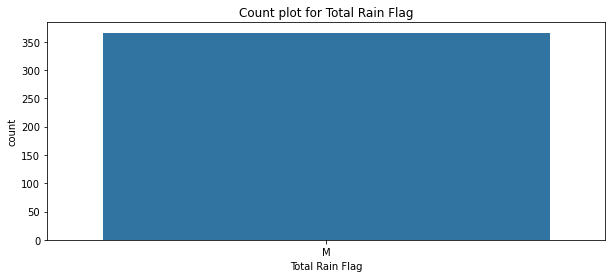

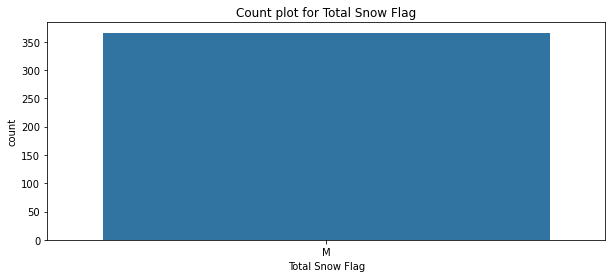

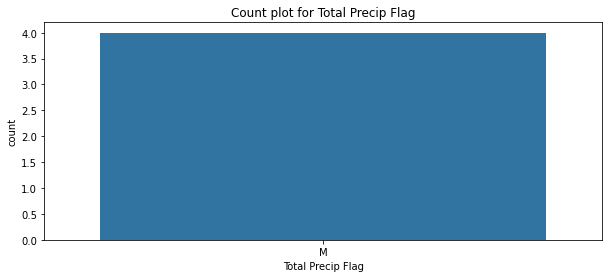

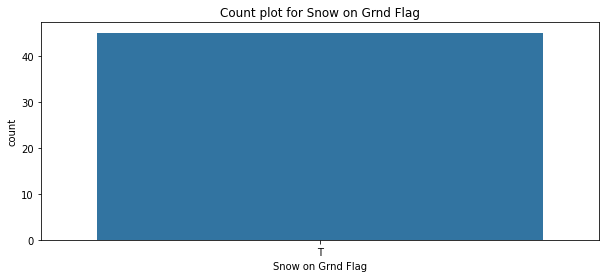

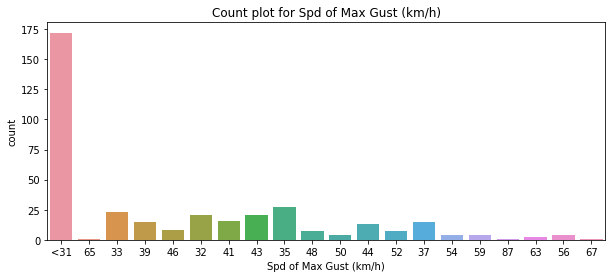

In [48]:
plot_count_plots(df)

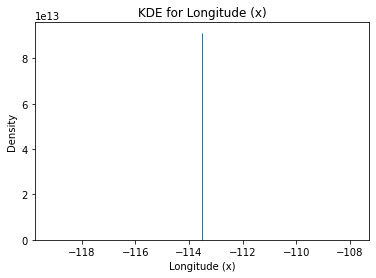

LinAlgError: singular matrix

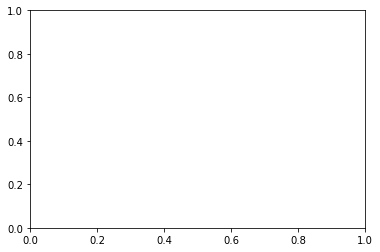

In [49]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    sns.kdeplot(df[col],shade=True)
    plt.title(f'KDE for {col}')
    plt.xlabel(col)
    plt.show()

LinAlgError: singular matrix

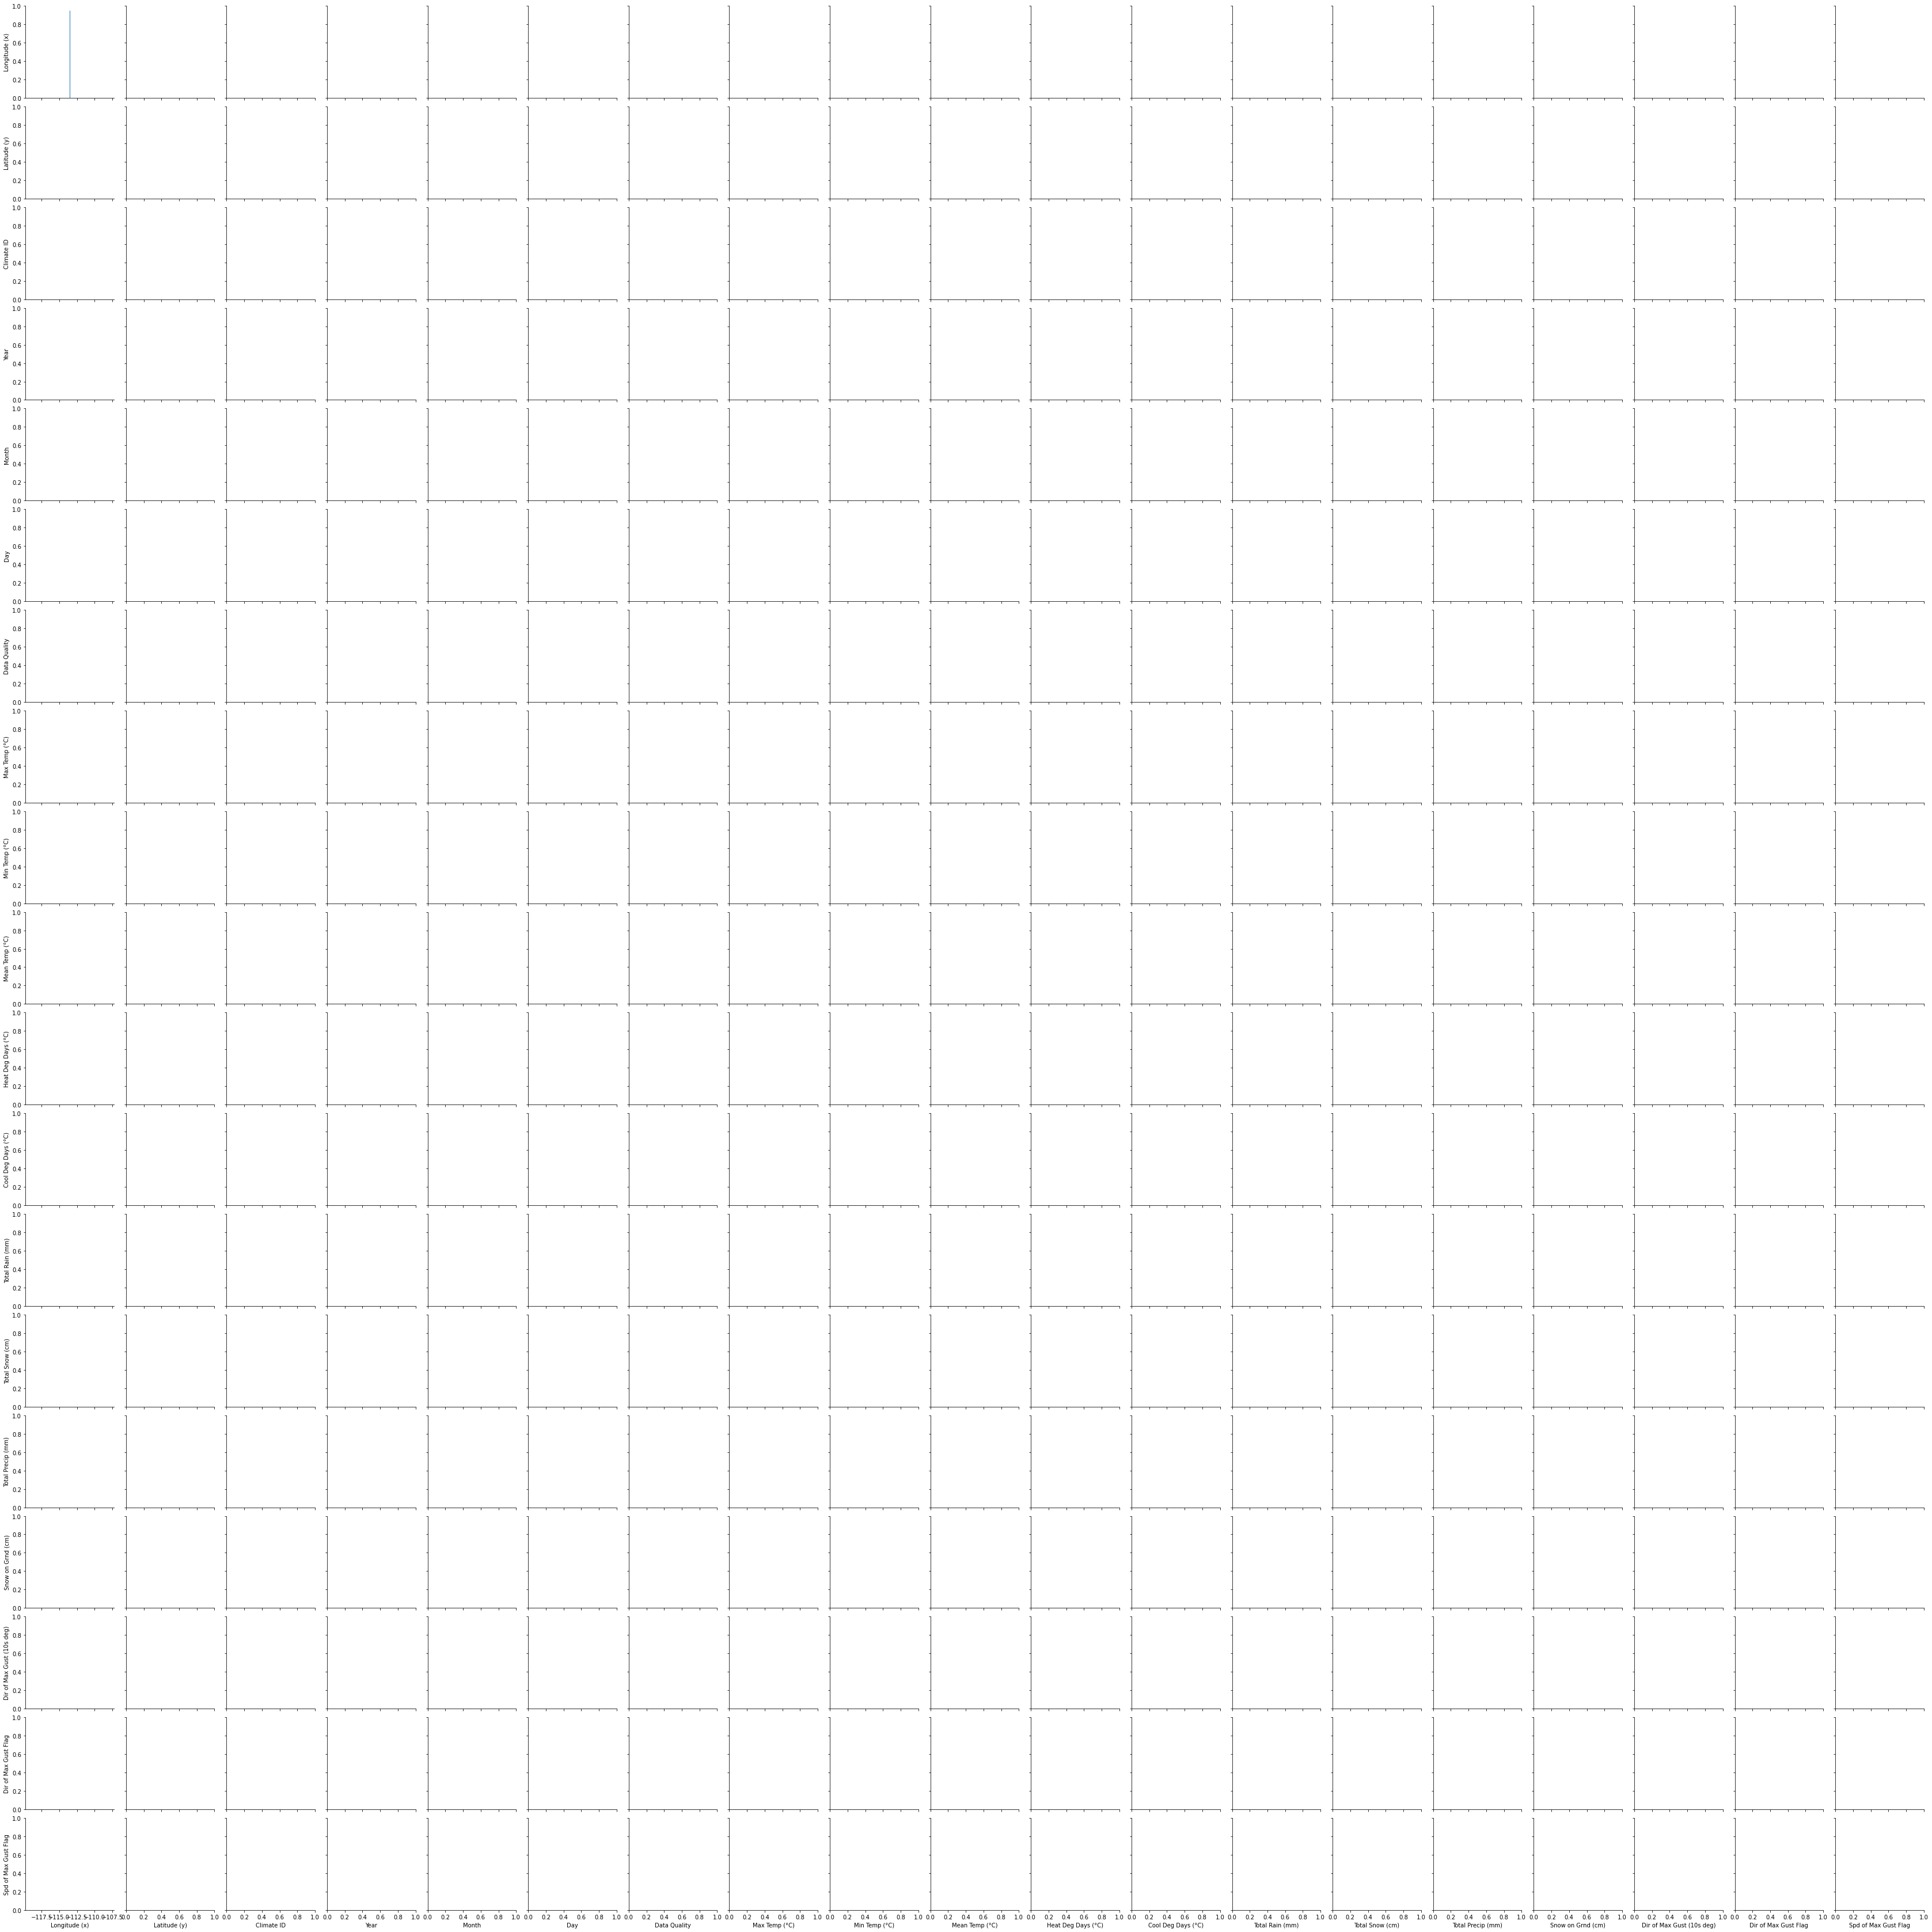

In [47]:
sns.pairplot(df, diag_kind="kde", vars=numerical_cols)

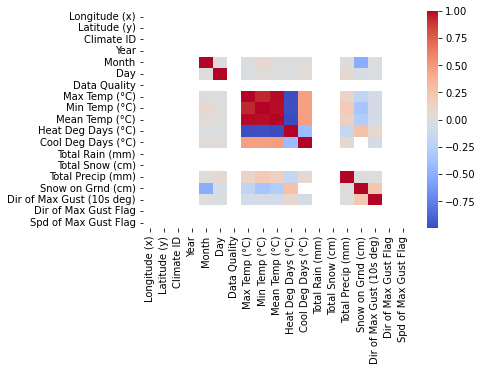

In [50]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [ ]:
categorical2=df4_ed.select_dtypes(include=['object']).columns
print("categorical Data:")
categorical2

In [ ]:
numerical2 = df4_ed.select_dtypes(include=['float64', 'int64']).columns
print("Numerical data:")
numerical2